# INF200 Lecture No 4

### 5 October 2014

## Today's topics

* Testing Python Code
    - Agile software development
    - Tools for testing
    - Writing tests
    - Nosetests basics
    - A Nosetest example
    - Useful tools from `nose.tools`
    - Running nosetests in PyCharm
* Review of PA01 *Chutes & Ladders*
* Object-oriented programming
    - A different look at Chutes & Ladders
* Exercises:
    - Introduction to EX04

## Testing Python code

- Systematic testing is essential part of quality control
- Do not trust code that comes without tests
- But: passings tests are no guarantee that everything is correct
    - Tests might not cover all code
    - Tests may not cover all possible situations
    - Tests may pass for the wrong reasons
- Different levels of testing
    - Unit tests: test "units", i.e., functions and methods
    - Integration tests: test larger parts, e.g., modules or packages
    - Acceptance tests: tests by client required for accepting delivery, test the entire system against client use-cases
    - Regression tests: test detecting bugs in earlier versions, kept to avoid falling back to old mistakes

### Agile software development

- [Agile software development](https://en.wikipedia.org/wiki/Agile_software_development) is a modern (2001-) set of software development methods
- Focus on quick delivery, frequent updates, and flexibility, while maintaining quality
- Strong focus on testing
- [Test-driven development](https://en.wikipedia.org/wiki/Test-driven_development) is part of Agile
    - Write tests first, otherwise you'll write them never
    - Writing tests for working code often results in weak tests
    - Therefore
        1. Write test
        1. Write code only when a test fails
        1. Write code until tests passes (and no more)
        1. Review and refactor code without breaking tests
        1. Go back to 1
    - Important: Always run all tests after code changes
- Advantages
    - We can be much more confident in our code
    - We can make changes, big and small, and immediately check that the code still works correctly
    
### Tools for testing

- Systems for automatically running tests on changes or commits
    - often known as [continuous integration](https://en.wikipedia.org/wiki/Continuous_integration)
    tools
    - "watch" VCS repository and run tests on each commit or push
    - notify developers in case of trouble
    - can be combined with code-review platforms
    - [Jenkins](http://jenkins-ci.org), [GitHub & Travis](http://docs.travis-ci.com/user/getting-started/), [Bitbucket Bamboo](https://www.atlassian.com/software/bamboo)
    
### Writing tests

- Built into Python: the [unittest](https://docs.python.org/2/library/unittest.html) package
- Very useful add-on: [nosetest](https://nose.readthedocs.org/en/latest/testing.html) (included in Anaconda)
- We will use nosetest 
- Material on testing
    - [nose introduction by Brian Okken](http://pythontesting.net/framework/nose/nose-introduction/)
    - [Dive into Python 3 chapter on unittesting](http://www.diveintopython3.net/unit-testing.html)

### Nosetest basics

- Nosetests finds tests automatically
- Everything with a name beginning with `test` or `Test` is a test
- A test *passes* if it does not throw an exception
- Tests usually contain an `assert`
- Module `nose.tools` provides useful tools
- Usual practice to put all tests into one or several files called `test_*` or collect them in a `tests` subpackage. 

### A Nosetest example

Testing code requiring random numbers introduces a special set of problems. Therefore, we stick here to a simple example, code to detect if a string is a palindrome. We create a a new subdirectory for our code.

In [1]:
%rm -rf texttools
%mkdir -p texttools

In [2]:
%%writefile texttools/test_palindrome.py

import nose.tools as nt

import palindrome as p

def test_empty():
    assert p.is_palindrome(''), 'Empty string false negative'
    
def test_lowercase_palindromes():
    nt.assert_true(p.is_palindrome('ana'), 'ana false negative')
    nt.assert_true(p.is_palindrome('anna'), 'anna false negative')

def test_lowercase_non_palindromes():
    nt.assert_false(p.is_palindrome('per'), 'per false positive')
    nt.assert_false(p.is_palindrome('kari'), 'kari false positive')
        
def test_uppercase_palindromes():
    nt.assert_true(p.is_palindrome('ANA'), 'ANA false negative')
    nt.assert_true(p.is_palindrome('ANNA'), 'ANNA false negative')

def test_uppercase_non_palindromes():
    nt.assert_false(p.is_palindrome('PER'), 'PER false positive')
    nt.assert_false(p.is_palindrome('KARI'), 'KARI false positive')

Writing texttools/test_palindrome.py


- The first test uses a normal Python assertion
- The remaning tests use assertions from `nose.tools`
- The `%%writefile` Python magic writes the contents of the cell to the given file

#### Running the tests

- We run the tests by running the program `nosetests`
- To run a program from a Notebook, we put an exclamation mark in front
- The `--where=texttools` option tells nosetests to run all tests it can find in directory `texttools`

In [3]:
!nosetests --where=texttools

E
ERROR: Failure: ImportError (No module named palindrome)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/loader.py", line 418, in loadTestsFromName
    addr.filename, addr.module)
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/importer.py", line 47, in importFromPath
    return self.importFromDir(dir_path, fqname)
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/importer.py", line 94, in importFromDir
    mod = load_module(part_fqname, fh, filename, desc)
  File "/Users/plesser/Courses/INF200/H2015/NMBU_INF200_H15/Lectures/L04_20151005/texttools/test_palindrome.py", line 4, in <module>
    import palindrome as p
ImportError: No module named palindrome

----------------------------------------------------------------------
Ran 1 test in 0.003s

FAILED (errors=1)


Not surprisingly, we get an error, because no `palindrome.py` exists yet. We create one and try again.

In [4]:
%%writefile texttools/palindrome.py

def is_palindrome(text):
    pass

Writing texttools/palindrome.py


In [5]:
!nosetests --where=texttools

FF.F.
FAIL: test_palindrome.test_empty
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/case.py", line 197, in runTest
    self.test(*self.arg)
  File "/Users/plesser/Courses/INF200/H2015/NMBU_INF200_H15/Lectures/L04_20151005/texttools/test_palindrome.py", line 7, in test_empty
    assert p.is_palindrome(''), 'Empty string false negative'
AssertionError: Empty string false negative

FAIL: test_palindrome.test_lowercase_palindromes
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/case.py", line 197, in runTest
    self.test(*self.arg)
  File "/Users/plesser/Courses/INF200/H2015/NMBU_INF200_H15/Lectures/L04_20151005/texttools/test_palindrome.py", line 10, in test_lowercase_palindromes
    nt.assert_true(p.is_palindrome('ana'), 'ana false negative')

A lot of tests failed, I guess we need to write code ...

In [6]:
%%writefile texttools/palindrome.py

def is_palindrome(text):
    return text == text[::-1]


Overwriting texttools/palindrome.py


Let's test again!

In [7]:
!nosetests --where=texttools

.....
----------------------------------------------------------------------
Ran 5 tests in 0.003s

OK


We can get a little more output with `--verbose`

In [8]:
!nosetests --verbose --where=texttools

test_palindrome.test_empty ... ok
test_palindrome.test_lowercase_palindromes ... ok
test_palindrome.test_lowercase_non_palindromes ... ok
test_palindrome.test_uppercase_palindromes ... ok
test_palindrome.test_uppercase_non_palindromes ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.002s

OK


### Useful tools from `nose.tools`

The following examples illustrate a few tools from `nose.tools`. 

#### Assertions

We first look at the various assertions provided by Nose. These are the same as the assertions provided by [Unittest](https://docs.python.org/2/library/unittest.html), except that the names are changed from camelcase (`assertEqual`) to PEP8-conformant names (`assert_equal`). For complete documentation, see [Python Standard Library Documentation, ch 25.3.7.1]([Unittest assertions](https://docs.python.org/2/library/unittest.html#test-cases)).

Many of the assertions also have negative counterparts, we will not show them here.

We execute all assertions in a try-except block so that we can print the error message prettily. If the assertion passes, nothing will be output.

In [9]:
import nose.tools as nt

##### Testing for equality

In [11]:
try:
    nt.assert_equals(3, 4)
except AssertionError as err:
    print err

3 != 4


This is pretty boring, but it is more interesting for sequences. Note that `assert_equals()` in this case not just compares the sequences with `==`, but actually checks them element by element.

In [12]:
try:
    nt.assert_equals([3, 4, 5], [3, 5, 6])
except AssertionError as err:
    print err

Lists differ: [3, 4, 5] != [3, 5, 6]

First differing element 1:
4
5

- [3, 4, 5]
?     ^  ^

+ [3, 5, 6]
?     ^  ^



In [13]:
try:
    nt.assert_equals({'a': 1, 'b': 2}, {'a': 1, 'b': 4})
except AssertionError as err:
    print err

{'a': 1, 'b': 2} != {'a': 1, 'b': 4}
- {'a': 1, 'b': 2}
?               ^

+ {'a': 1, 'b': 4}
?               ^



`assert_equal()` (no plural "s") is identical to `assert_equals()`.

In [14]:
try:
    nt.assert_equal({'a': 1, 'b': 2}, {'a': 1, 'b': 4})
except AssertionError as err:
    print err

{'a': 1, 'b': 2} != {'a': 1, 'b': 4}
- {'a': 1, 'b': 2}
?               ^

+ {'a': 1, 'b': 4}
?               ^



##### Testing for inequality

We will not illustrate these here, they should be rather obvious.

- `assert_greater()`
- `assert_greater_equal()`
- `assert_less()`
- `assert_less_equal()`

##### Equality and floating point numbers

Equality testing on floating point numbers can be problematic due to rounding errors. Therefore, one should use `assert_almost_equal()`.

In [15]:
import math

try:
    nt.assert_equal(math.exp(math.log(0.1)), 0.1)
except AssertionError as err:
    print err

0.10000000000000002 != 0.1


In [16]:
try:
    nt.assert_almost_equal(math.exp(math.log(0.1)), 0.1)
except AssertionError as err:
    print err

We can change the precision required, either in giving a number of decimals or a maximum allowed difference:

In [17]:
try:
    nt.assert_almost_equal(1.000001, 1, places=4)
except AssertionError as err:
    print err

In [18]:
try:
    nt.assert_almost_equal(1.000001, 1, places=10)
except AssertionError as err:
    print err

1.000001 != 1 within 10 places


In [20]:
try:
    nt.assert_almost_equal(1.000001, 1, delta=0.005)
except AssertionError as err:
    print err

In [21]:
try:
    nt.assert_almost_equal(1.000001, 1, delta=1e-10)
except AssertionError as err:
    print err

1.000001 != 1 within 1e-10 delta


##### Testing for object identity, None-ness, and membership

In [22]:
a = [1, 2]
b = a         # same object as a
c = [1, 2]    # different object, same value
n = None

In [23]:
try:
    nt.assert_is(a, b)
except AssertionError as err:
    print err

In [24]:
try:
    nt.assert_is(a, c)
except AssertionError as err:
    print err

[1, 2] is not [1, 2]


In [25]:
try:
    nt.assert_is_none(n)
except AssertionError as err:
    print err

In [26]:
try:
    nt.assert_is_not_none(n)
except AssertionError as err:
    print err

unexpectedly None


In [27]:
try:
    nt.assert_in(1, [2, 3, 4])
except AssertionError as err:
    print err

1 not found in [2, 3, 4]


In [28]:
try:
    nt.assert_in('a', {'c': 2})
except AssertionError as err:
    print err

'a' not found in {'c': 2}


##### Equality of items

Check that two sequences contain the same items, independent of order.

In [29]:
try:
    nt.assert_items_equal([1, 4, 2, 8], [1, 2, 4, 8])
except AssertionError as err:
    print err

In [30]:
try:
    nt.assert_items_equal([1, 7, 2, 8], [1, 2, 4, 8])
except AssertionError as err:
    print err

Element counts were not equal:
First has 1, Second has 0:  7
First has 0, Second has 1:  4


In [31]:
try:
    nt.assert_items_equal('Petter', 'retePt')
except AssertionError as err:
    print err

##### Testing for assertions

Sometimes, it is important to check that code will raise an assertion in a given situation. This can be done with `assert_raises()`. Note the following:

- The first argument is the expected exception
- The second argument is the function or method to be called and tested for raising an exception.
- All other arguments are passed to the function.
- In contrast to all other assertions, you cannot add your own error message.

In [32]:
import math

def root(x):
    if x < 0:
        raise ValueError('x >= 0 required.')
    return math.sqrt(x)

In [33]:
try:
    nt.assert_raises(ValueError, root, 10)
except AssertionError as err:
    print err

ValueError not raised


Note: The cell above is only meant to illustrate the type of error reported by `nt.assert_raises()` if an expected exception is not raised. Clearly, the `root()` function should not raise an exception for argument 10.

In [34]:
try:
    nt.assert_raises(ValueError, root, -10)
except AssertionError as err:
    print err

#### Assert runtime

The following is provided by Nose and not available in standard Unittests. It tests that code completes within a given time. This may be used to ascertain that performance fulfills certain requirements. Note that it will not catch infinite loops: if the test contains an infinite loop, the testsuite will simply hang.

This is achieved by adding a `@timed()` decorator to a test. We need to do this in an example script.

In [35]:
%%writefile nt_timed_example.py

from nose.tools import timed
import time

@timed(0.1)
def test_long_sleep():
    time.sleep(0.2)
    
@timed(0.1)
def test_fast_addition():
    1 + 1

Writing nt_timed_example.py


In [36]:
!nosetests --verbose nt_timed_example.py

nt_timed_example.test_long_sleep ... FAIL
nt_timed_example.test_fast_addition ... ok

FAIL: nt_timed_example.test_long_sleep
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/case.py", line 197, in runTest
    self.test(*self.arg)
  File "/Users/plesser/anaconda/lib/python2.7/site-packages/nose/tools/nontrivial.py", line 100, in newfunc
    raise TimeExpired("Time limit (%s) exceeded" % limit)
TimeExpired: Time limit (0.1) exceeded

----------------------------------------------------------------------
Ran 2 tests in 0.208s

FAILED (failures=1)


### Nosetests in PyCharm

#### Running nosetests in PyCharm

1. go to `Run > Edit configurations ...`
1. click `+` in top-left corner
1. choose `Python tests > Nosetests`
1. give the test run configuration a name, e.g. `Texttools tests`
1. select `All in folder`, browse to folder with your code
1. click `OK`
1. you can now run the tests with the `Run` button
1. with the "Toggle auto tests" icon, you can make tests run on any change

#### Testing coverage

- It is important to know how much code is actually tested
- This is called *test coverage*
- Complete coverage can be difficult to achieve in complex programs
- Even complete coverage does not guarantee absence of errors
- In PyCharm
    1. go to Preferences/Settings
        1. go to `Build, Execution, Deployment > Coverage`
        1. check off for "Activate Coverage View"
        1. check off for "Use bundled coverage.py"
    1. from the `Run` menu, choose `Run Texttools tests with Coverage`

## Review of Chutes & Ladders

The code is available in `Exercises/pa01/` in the Course repository.

### Implementation

#### Set up

In [37]:
import random
import numpy
CHUTES_AND_LADDERS = {24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70,
                      1: 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85}
GOAL = 90

- Chutes, ladders and goal defined as *constants*
- We can combine chutes and ladders in one dictionary

#### Multi-game functions

In [38]:
def multiple_games(num_games, num_players):
    return [single_game(num_players) for _ in range(num_games)]

def multi_game_experiment(num_games, num_players, seed):
    random.seed(seed)
    return multiple_games(num_games, num_players)

- `multi_game_experiment()` 
    - not strictly necessary
    - makes it easier to run with different seeds
    - using it we are sure we remember to specify a seed

#### Single-game function

In [39]:
def single_game(num_players):

    positions = [0] * num_players
    num_moves = 0

    while max(positions) < GOAL:
        for player in range(num_players):
            positions[player] += random.randint(1, 6)
            if positions[player] in CHUTES_AND_LADDERS:
                positions[player] = CHUTES_AND_LADDERS[positions[player]]
        num_moves += 1

    return num_moves

- We create list representing positions
- Number of moves is the same for all players, need just one counter
- We only need to look at most advanced player in test
- We first advance by die cast, then update according to chutes and ladders
- Question: If we had to tell which player has won, how would we find out?

#### Median function

- You could use `numpy.median()`
- We implement it explicitly here
- Note that for even number of elements, the median is the average of the two middle elements

In [38]:
def median(data):
    sdata = sorted(data)
    n = len(sdata)
    return (sdata[n / 2] if n % 2 == 1
            else 0.5 * (sdata[n / 2 - 1] + sdata[n / 2]))

- We must sort the data
- The conditional expression `x if a else y` uses the correct expression depending on odd/even element number

### Exploration

#### Data collection

We generate data for 1, 2, 4 and 8 players. Since all these simulations are parts of a single randomized experiment, we seed the random number generator only once; alternatively, we could have used a different random number generator seed for each number of players.

In [40]:
import sys
sys.path = ['../../Exercises/pa01/'] + sys.path

In [41]:
import random
from chutes import multiple_games

In [42]:
seed = 1234567
num_games = 1000
num_players = [1, 2, 4, 8]

In [43]:
random.seed(seed)
durations = {num: multiple_games(num_games, num) for num in num_players}

#### Data analysis

To determine the limits of our histograms, we first look at the shortest and longest game durations:

In [44]:
import numpy as np

In [45]:
for num, dur in sorted(durations.items()):
    print 'Players: {:2d}, Shortest: {:2d}, Mean: {:5.1f}, Longest: {:4d}'.format(num, 
                                                                                  min(dur), 
                                                                                  np.mean(dur), 
                                                                                  max(dur))

Players:  1, Shortest:  4, Mean:  36.3, Longest:  188
Players:  2, Shortest:  4, Mean:  24.8, Longest:   84
Players:  4, Shortest:  4, Mean:  17.4, Longest:   70
Players:  8, Shortest:  4, Mean:  13.6, Longest:   33


#### Creating and plotting histograms

See Notebook in `Exercises/pa01` for more detailed comments on creating and plotting histograms.

In [46]:
bins = range(201)
hists = {num: np.histogram(dur, bins=bins)[0] for num, dur in durations.items()}

In [49]:
for num, hst in sorted(hists.items()):
    print 'Players: {:2d}, Max count: {:4d}'.format(num, max(hst))

Players:  1, Max count:   33
Players:  2, Max count:   50
Players:  4, Max count:   69
Players:  8, Max count:   81


In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 4]

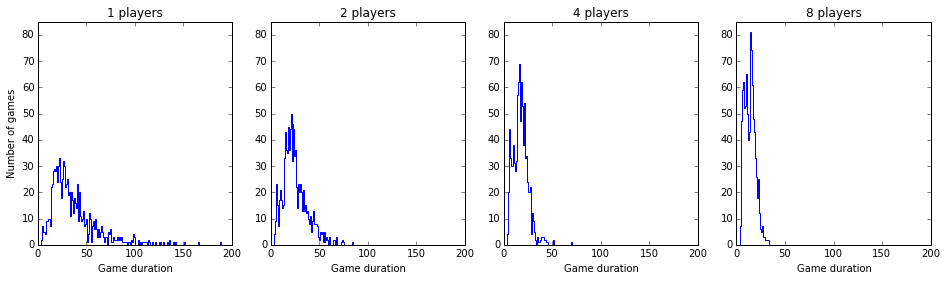

In [48]:
for plot_num, n_players in enumerate(sorted(hists.keys())):
    plt.subplot(1, 4, plot_num+1)
    plt.step(bins[:-1], hists[n_players], where='mid')
    plt.xlim(0, 200)
    plt.ylim(0, 85)
    plt.xlabel('Game duration')
    if plot_num == 0:
        plt.ylabel('Number of games')        
    plt.title('{} players'.format(n_players));

## Object-oriented programming: A different look at Chutes & Ladders

### Present implementation: procedural programming style

In [49]:
CHUTES_AND_LADDERS = {24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70,
                      1: 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85}
GOAL = 90

def single_game(num_players):

    positions = [0] * num_players
    num_moves = 0

    while max(positions) < GOAL:
        for player in range(num_players):
            positions[player] += random.randint(1, 6)
            if positions[player] in CHUTES_AND_LADDERS:
                positions[player] = CHUTES_AND_LADDERS[positions[player]]
        num_moves += 1

    return num_moves

def multiple_games(num_games, num_players):
    return [single_game(num_players) for _ in range(num_games)]

- We could divide the code into smaller units for clarity and testability

In [50]:
CHUTES_AND_LADDERS = {24: 5, 33: 3, 42: 30, 56: 37, 64: 27, 74: 12, 87: 70,
                      1: 40, 8: 10, 36: 52, 43: 62, 49: 79, 65: 82, 68: 85}
GOAL = 90

def move_player(position):
    position += random.randint(1, 6)
    if position in CHUTES_AND_LADDERS:
        position = CHUTES_AND_LADDERS[position]
        
def no_player_has_reached_goal(positions):
    return max(positions) < GOAL

def single_game(num_players):
    positions = [0] * num_players
    num_moves = 0

    while no_player_has_reached_goal(positions):
        for player in range(num_players):
            positions[player] = move_player(positions[player])
        num_moves += 1

    return num_moves

def multiple_games(num_games, num_players):
    return [single_game(num_players) for _ in range(num_games)]

##### Procedural programming

- Classic programming style developed since the 1950s
- Large programs are divided into *procedures* (called *functions*  in Python and many other languages)
- Data is exchanged between functions by
    - passing arguments to functions
    - returning values from functions
    - sometimes by global variables
- Problems:
    - data and actions only loosely coupled
    - e.g. `positions` list
    - can make development difficult, e.g., change of `positions` list to other data structure
    - how to handle more complex rules, e.g.,
        - each player ha limited amount of energy
        - players have different speeds
        - player behavior changes after sliding down/climbing up


##### Object-oriented programming

- Key ideas
    - Combine data and behavior
    - Provide interfaces, hide implementation
- Invented in the 1960s by
    - [Kristen Nygaard](https://en.wikipedia.org/wiki/Kristen_Nygaard) and [Ole-Johan Dahl](https://en.wikipedia.org/wiki/Ole-Johan_Dahl)
    - First object-oriented language: [Simula](https://en.wikipedia.org/wiki/Simula) (1967)
- Became dominant programming paradigm in the 1990s with C++ and Java
- Today: Example
- Next week: Theory and details

#### Object-oriented Chutes & Ladders implementation

##### Analysis

- What *is* a player?
    - What data is necessary to represent a player?
- What *does* a player *do*?
    - Which actions does a player need to execute?
    
##### Design: A player class

- Data or *attributes* (what is ...?)
- Actions or *methods* (what does ...?)

## Introduction to EX04

For details, [see the task description on the course Wiki](https://bitbucket.org/heplesser/nmbu_inf200_h15/wiki/Exercise%2004).

- **Task A:** Tests for bubblesort
- **Task B:** Tests for median function